In [1]:
import pymongo
from pprint import pprint
import re
import matplotlib.pyplot as plt
from PIL import Image
from scipy.misc import imread
import wordcloud

In [2]:
client = pymongo.MongoClient()
db = client['bda']
coursera = db['coursera']

## Getting highly rated courses

In [3]:
for doc in coursera.find({'rating': 5}).sort([('rating', pymongo.DESCENDING), ('title', pymongo.ASCENDING)]):
    print('{} {}'.format(doc['rating'], doc['title']))

5.0 Advanced Valuation and Strategy - M&A, Private Equity, and Venture Capital
5.0 Algorithms, Part II
5.0 Build a Modern Computer from First Principles: Nand to Tetris Part II (project-centered course)
5.0 C# Programming for Unity Game Development Capstone Project
5.0 Google Cloud Platform Fundamentals: Core Infrastructure em Português Brasileiro
5.0 How Google does Machine Learning en Español
5.0 IBM Customer Engagement Specialist Professional Certificate
5.0 Mobile Interaction Design: How to Design Usable Mobile Products and Services
5.0 Training and Learning Programs for Volunteer Community Health Workers
5.0 用 Python 做商管程式設計（三）(Programming for Business Computing in Python (3))


## Number of Python courses

In [4]:
pattern = re.compile('.*python.*', re.IGNORECASE)
for doc in coursera.find({'title': {'$regex': pattern}}).sort([('rating', pymongo.DESCENDING), ('title', pymongo.ASCENDING)]):
    print('{} {}'.format(doc['rating'], doc['title']))

5.0 用 Python 做商管程式設計（三）(Programming for Business Computing in Python (3))
4.9 An Introduction to Interactive Programming in Python (Part 2)
4.9 Introdução à Ciência da Computação com Python Parte 1
4.9 Introdução à Ciência da Computação com Python Parte 2
4.9 Python Data Structures
4.9 用 Python 做商管程式設計（一）(Programming for Business Computing in Python (1))
4.8 An Introduction to Interactive Programming in Python (Part 1)
4.8 Programming for Everybody (Getting Started with Python)
4.8 Python Programming Essentials
4.8 Python for Everybody
4.8 Using Databases with Python
4.8 Using Python to Access Web Data
4.8 Математика и Python для анализа данных
4.7 Introduction to Scripting in Python
4.7 Machine Learning with Python
4.7 Python 3 Programming
4.7 Python Data Analysis
4.7 Python Data Representations
4.7 Основы программирования на Python
4.7 Погружение в Python
4.7 用 Python 做商管程式設計（二）(Programming for Business Computing in Python (2))
4.6 Applied Machine Learning in Python
4.6 Capstone: Ret

## Programming Courses

In [5]:
languages = ['Python', 'Java', 'Javascript', 'C++', 'C#', 'Angular']
languages_count = []
for language in languages:
    pattern = re.compile('.*' + re.escape(language) + '.*', re.IGNORECASE)
    print('Language: {}'.format(language.replace('\\', '')))
    courses = coursera.find({'title': {'$regex': pattern}}).sort([('rating', pymongo.DESCENDING), ('title', pymongo.ASCENDING)])
    for doc in courses:
        print('{} {}'.format(doc['rating'], doc['title']))
    languages_count.append(courses.count())
    print()

Language: Python
5.0 用 Python 做商管程式設計（三）(Programming for Business Computing in Python (3))
4.9 An Introduction to Interactive Programming in Python (Part 2)
4.9 Introdução à Ciência da Computação com Python Parte 1
4.9 Introdução à Ciência da Computação com Python Parte 2
4.9 Python Data Structures
4.9 用 Python 做商管程式設計（一）(Programming for Business Computing in Python (1))
4.8 An Introduction to Interactive Programming in Python (Part 1)
4.8 Programming for Everybody (Getting Started with Python)
4.8 Python Programming Essentials
4.8 Python for Everybody
4.8 Using Databases with Python
4.8 Using Python to Access Web Data
4.8 Математика и Python для анализа данных
4.7 Introduction to Scripting in Python
4.7 Machine Learning with Python
4.7 Python 3 Programming
4.7 Python Data Analysis
4.7 Python Data Representations
4.7 Основы программирования на Python
4.7 Погружение в Python
4.7 用 Python 做商管程式設計（二）(Programming for Business Computing in Python (2))
4.6 Applied Machine Learning in Python


c:\users\jameel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if __name__ == '__main__':


In [6]:
languages_count

[40, 29, 9, 8, 3, 1]

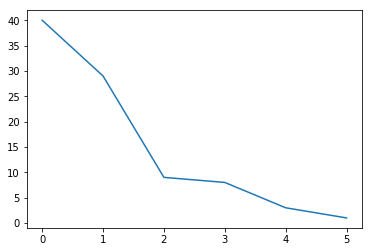

In [7]:
plt.plot(list(range(len(languages_count))), languages_count)

<BarContainer object of 6 artists>

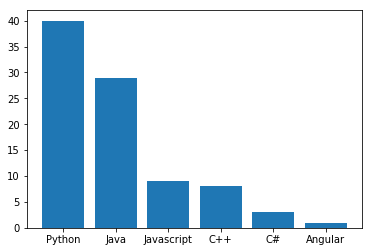

In [8]:
plt.bar(x = languages, height = languages_count)

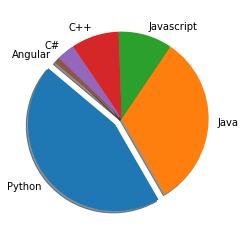

In [9]:
plt.pie(languages_count, labels = languages, explode = (0.1, 0, 0, 0, 0, 0),
       shadow=True, startangle=140)
print()

## Word Cloud

In [10]:
text = ''
for doc in coursera.find({}, {'title': 1}):
    text += ' ' + doc['title']

In [11]:
image = imread('coursera.jpg')

c:\users\jameel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [12]:
cloud = wordcloud.WordCloud(mask=image, stopwords=wordcloud.STOPWORDS).generate(text)

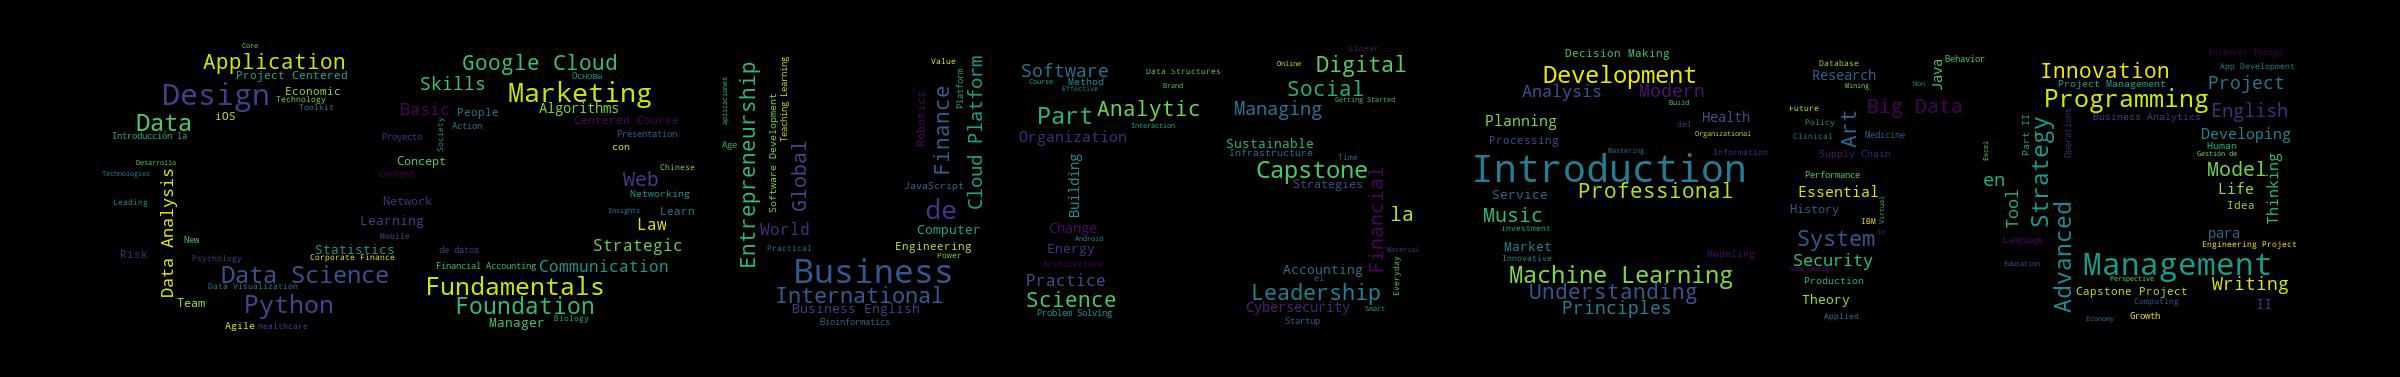

In [13]:
cloud.to_file('coursera_cloud.jpg')
Image.open('coursera_cloud.jpg')